In [3]:
import numpy as np
data1 = np.loadtxt('vela_Pulsar.mbr')

Loading the Vela Pulsar Data

In [4]:
north_data = data1[:,[0]]
south_data = data1[:,[1]]
north_data = np.array(north_data,dtype = complex)
south_data = np.array(south_data,dtype = complex)


Making Matrix of dimention $512 \times 60000$

In [5]:
north_data = np.reshape(north_data,(512,60000),order = 'F')
south_data = np.reshape(south_data,(512,60000),order = 'F')

Here we are calculating $FFT(data)$ of every column and taking their square of absolute value i.e. $|FFT|^2$

In [6]:
# north_fft = np.zeros(512,60000)
# south_fft = np.zeros(512,60000)
new_mat = np.zeros((512,60000),dtype = complex)
for i in range(0,len(north_data[0])):
    north_data[:,i] = np.fft.fft(north_data[:,i])
    south_data[:,i] = np.conj(np.fft.fft(south_data[:,i]))
    new_mat[:,i] = np.absolute(np.multiply(north_data[:,i],south_data[:,i]))
# north_data = north_data.astype(float)
# south_data = south_data.astype(float)
# for i in range(0,999):
  


Reducing noise by taking average of every 60 elements....

In [11]:
dy_Mat = np.zeros((512,1000))
for i in range(0,1000):
    dy_Mat[:,i] = np.sum(np.real(new_mat[:,60*i:60*(i+1)-1]),axis = 1)

Plotting The Matrix

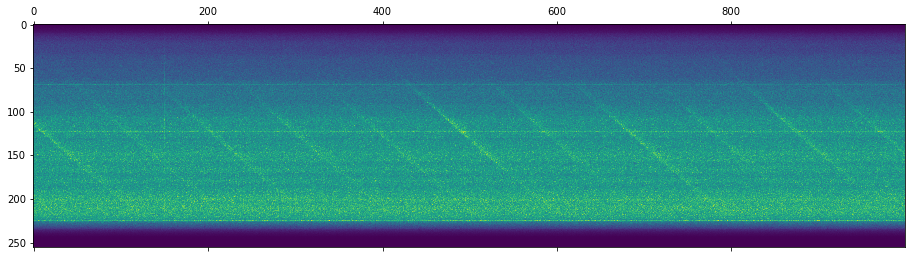

In [12]:
import matplotlib.pyplot as plt 
plt.matshow(dy_Mat[:256,:])